In [1]:
from mne import Epochs, find_events
from time import time, strftime, gmtime
import os
import numpy as np
from utils import utils
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


### Load data into MNE objects


In [34]:
all_evokeds = []
all_data = [] 

%matplotlib inline

good_subjects = 0

for curr_subject in range(0, 34):
    print("Current Subject #" + str(curr_subject+1))

    raw = utils.load_data('../data/subjects/', 
                          subject_nb = curr_subject+1, 
                          sfreq = 256., 
                          session_nb = [1]);

    raw.notch_filter(60);
    raw.filter(1,20, method='iir', verbose= False);

    events = find_events(raw);
    event_id = {'Positive': 1, 'Neutral': 2};

    epochs = Epochs(raw, events=events, 
                    event_id=event_id, 
                    tmin=-0.1, 
                    tmax=0.8, 
                    baseline=(-0.1,0),
                    reject= {'eeg': 200e-6}, 
                    preload=True, 
                    verbose=False, picks=[0,1,2,3]);

    
    #from autoreject import get_rejection_threshold  # noqa
    #reject = get_rejection_threshold(epochs, decim=1)
    
    sample_drop = (1 - len(epochs.events)/len(events)) * 100
    print('sample drop %: ', sample_drop)

    conditions = OrderedDict()
    conditions['1-Positive'] = [1]
    conditions['2-Neutral'] = [2]
    
    curr_title = "Subject #" +str(curr_subject+1)

    if sample_drop < 50:
        good_subjects += 1
        #fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
        #                                ci=97.5, n_boot=1000, 
        #                                title = curr_title,
        #                                diff_waveform=(2,1),
        #                                ylim=(-20, 20));
        #plt.show()
        
        evokeds = [epochs[name].average() for name in ('Positive', 'Neutral')]

        %matplotlib inline
        from mne.viz import plot_evoked_topo
        colors = 'red', 'blue'

        #plot_evoked_topo(evokeds, 
        #                 color=colors, 
        #                 title=curr_title, 
        #                 background_color='w');
        
        all_evokeds.append(evokeds)
        
        evokeds[0].data.shape  #pos
        
        evokeds[1].data.shape  #neu
        all_data.append(np.stack((   evokeds[0].data, evokeds[1].data))) 

        plt.show() #'''

#print(good_subjects)



Current Subject #1
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
105 events found
Event IDs: [1 2]
sample drop %:  100.0
Current Subject #2
Creating RawArray with float64 data, n_channels=5, n_times=30420
    Range : 0 ... 30419 =      0.000 ...   118.824 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
105 events found
Event IDs: [1 2]
sample drop %:  33.333333333333336
Current Subject #3
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  0.9345794392523366
Current Subject #4
Creating RawArray with float64 data, n_channels=5, n_times=18

Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  27.10280373831776
Current Subject #28
Creating RawArray with float64 data, n_channels=5, n_times=30456
    Range : 0 ... 30455 =      0.000 ...   118.965 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  3.738317757009346
Current Subject #29
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of 1691 samples (6.605 sec) selected
107 events found
Event IDs: [1 2]
sample drop %:  88.78504672897196
Current Subject #30
Creating RawArray with float64 data, n_channels=5, n_times=30432
    Range : 0 ... 30431 =      0.000 ...   118.871 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz
Filter length of

In [35]:
#epochs['Positive']

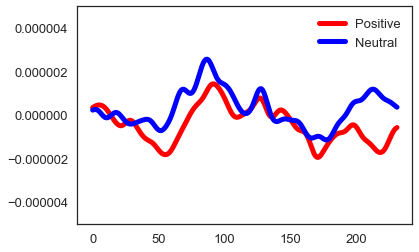

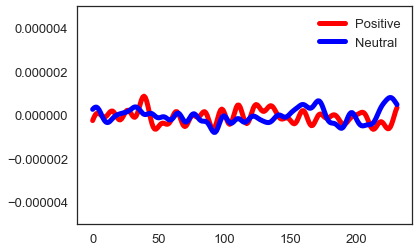

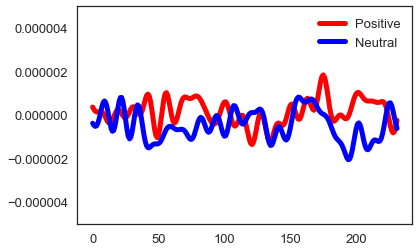

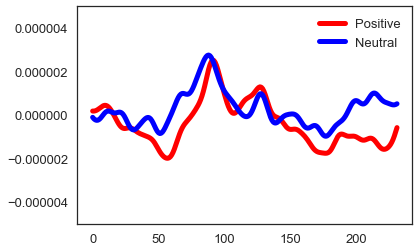

In [36]:
all_data1 = np.asarray(all_data)
all_data1.shape

for sensor in range(4):
    #plt.plot(all_data1[:,0,sensor,:].T, color = 'red', alpha = 0.1);
    plt.plot(np.mean(all_data1[:,0,sensor,:], axis =0), color = 'red', linewidth = 5, label = 'Positive');

    #plt.plot(all_data1[:,1,sensor,:].T, color = 'blue', alpha = 0.1);
    plt.plot(np.mean(all_data1[:,1,sensor,:], axis =0), color = 'blue', linewidth = 5, label = 'Neutral' );
    plt.ylim(-0.000005, 0.000005)
    plt.legend()
    plt.show()

(-6e-06, 6e-06)

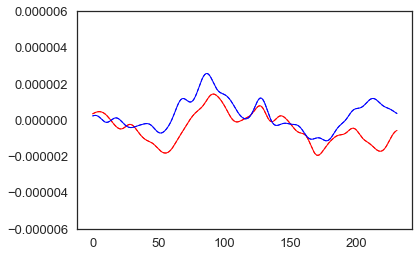

In [37]:
plt.plot(np.mean(all_data1[:,0,0,:], axis =0), color = 'red', linewidth = 1, linestyle ='--');
plt.plot(np.mean(all_data1[:,0,0,:], axis =0), color = 'red', linewidth = 1);

plt.plot(np.mean(all_data1[:,1,0,:], axis =0), color = 'blue', linewidth = 1, linestyle ='--');
plt.plot(np.mean(all_data1[:,1,0,:], axis =0), color = 'blue', linewidth = 1 );
plt.ylim(-0.000006, 0.000006)

(-6e-06, 6e-06)

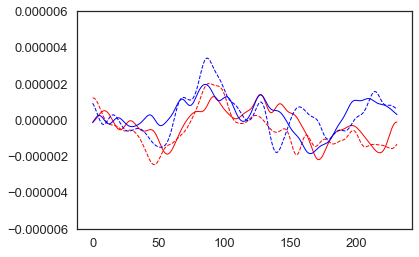

In [38]:
plt.plot(np.mean(all_data1[:9,0,0,:], axis =0), color = 'red', linewidth = 1, linestyle ='--');
plt.plot(np.mean(all_data1[10:,0,0,:], axis =0), color = 'red', linewidth = 1);

plt.plot(np.mean(all_data1[:9,1,0,:], axis =0), color = 'blue', linewidth = 1, linestyle ='--');
plt.plot(np.mean(all_data1[10:,1,0,:], axis =0), color = 'blue', linewidth = 1 );
plt.ylim(-0.000006, 0.000006)

In [39]:
#first = np.mean(all_data1[:,0,0,:], axis =0) - np.mean(all_data2[:,0,0,:], axis =0)
#second = np.mean(all_data1[:,1,0,:], axis =0) - np.mean(all_data2[:,1,0,:], axis =0)

#plt.plot(first)
#plt.plot(second)

In [40]:
epochs.events[:, 2]

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1])

In [41]:
pos = []
for i in range(len(all_evokeds)):
    pos.append(all_evokeds[i][0])

print(pos)

neu = []
for i in range(len(all_evokeds)):
    neu.append(all_evokeds[i][1])

print('\n' + str(neu))

[<Evoked  |  'Positive' (mean, N=43), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=53), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=34), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=38), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=34), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=38), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=51), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=27), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=36), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=48), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=31), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=53), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>, <Evoked  |  'Positive' (mean, N=50), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>

In [42]:
import mne
grand_average_pos = mne.grand_average(pos)
grand_average_pos

grand_average_neu = mne.grand_average(neu)
grand_average_neu

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


<Evoked  |  'Grand average (n = 26)' (mean, N=26), [-0.10156, 0.80078] sec, 4 ch, ~24 kB>

In [43]:
ppos = []
for i in range(len(pos)):
    ppos.append( pos[i].data)

import numpy as np
ppos = np.asarray(ppos)
ppos.shape

nneu = []
for i in range(len(neu)):
    nneu.append( neu[i].data)

nneu = np.asarray(nneu)
nneu.shape

(26, 4, 232)

In [45]:
tmin = -0.1
info = mne.create_info(
    ch_names = ['TP9', 'AF7', 'AF8', 'TP10'],
    ch_types = ['eeg', 'eeg', 'eeg', 'eeg'],
    sfreq = 256,
    
)

# The number of epochs that were averaged
nave = 26

# A comment to describe to evoked (usually the condition name)
comment = "test"


In [46]:
evoked_array = mne.EvokedArray(grand_average_pos.data, 
                               info, 
                               tmin,
                               comment=comment, 
                               nave=nave)
#dig = epochs.info['dig'],


In [48]:
#epochs

In [49]:
#evoked_array.set_montage?

In [56]:
plot_evoked_topo?

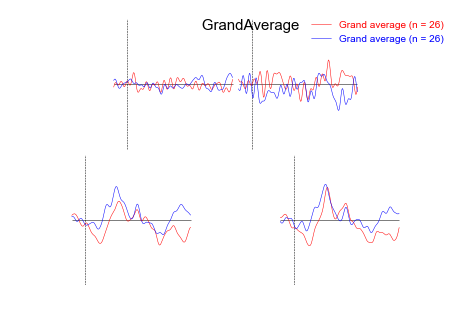

In [55]:
plot_evoked_topo([grand_average_pos, grand_average_neu], 
                  color = colors, 
                  ylim  = dict(eeg=[-5, 5]),
                  title = "                                       GrandAverage", 
                  background_color='w');

In [88]:
thres = e-6
sensor = 0
plt.plot(grand_average_pos.data[sensor,:] - grand_average_neu.data[sensor,:], 
             'black', 
              alpha = 0.5);

sensor = 3
plt.plot(grand_average_pos.data[sensor,:] - grand_average_neu.data[sensor,:], 
             'black', 
              alpha = 0.5);    
plt.ylim([-thres, thres])
plt.show()

NameError: name 'e' is not defined

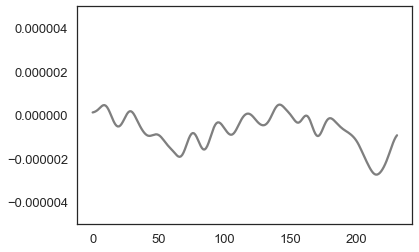

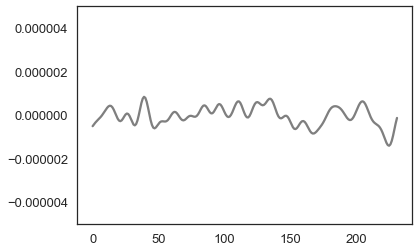

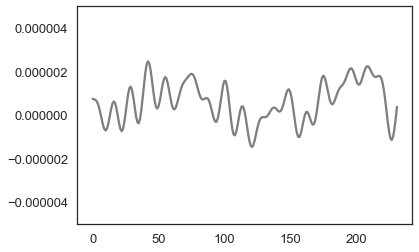

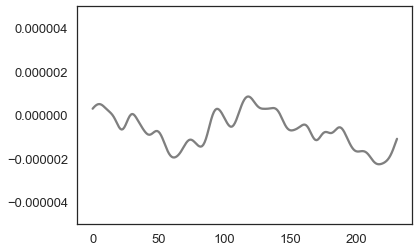

In [74]:
#plt.plot(grand_average_pos.data[0,:], 'r');
#plt.plot(grand_average_neu.data[0,:], 'b');

thres = 5e-6
for sensor in range(4):
    plt.plot(grand_average_pos.data[sensor,:] - grand_average_neu.data[sensor,:], 
             'black', 
              alpha = 0.5);
    
    plt.ylim([-thres, thres])
    plt.show()

In [ ]:
fig, ax = utils.plot_conditions?

In [ ]:
fig, ax = utils.plot_conditions

In [ ]:
pos[0].plot_image(exclude = ['AF8', 'AF7']);
neu[0].plot_image(exclude = ['AF8', 'AF7']);

pos[1].plot_image(exclude = ['AF8', 'AF7']);
pos[2].plot_image(exclude = ['AF8', 'AF7']);
pos[3].plot_image(exclude = ['AF8', 'AF7']);
pos[4].plot_image(exclude = ['AF8', 'AF7']);

In [ ]:
evokeds[0].plot_image(exclude = ['AF8', 'AF7']);

In [ ]:
evokeds

In [ ]:
evokeds

In [ ]:
plt.ion()
%matplotlib qt
raw.plot()

In [ ]:
#epochs.get_data().shape

In [ ]:
evoked = epochs.average()

title = 'EEG Original reference'
evoked.plot(titles = dict(eeg=title), time_unit='s');

#

In [ ]:
#evoked.plot_topomap(times=[0.1], size=3., title=title, time_unit='s');


In [ ]:
#utils.plot_conditions?

Here we have a very nice deflection in the temporal channels around 200ms for face stimuli. This is likely the N170, although appearing slightly later due to delay in receiving the data over bluetooth. 

There's not much to see in the frontal channels (AF7 and AF8), but that's to be expected based on the fact that the N170 is mostly a lateral posterior brain phenomenon

In [80]:
all_data = epochs.get_data();
all_data.shape

(88, 4, 232)

In [81]:
epochs.events[:,2]==2

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False, False])

In [82]:
cond2_trials = all_data[epochs.events[:,2]==2, :, :]
cond2_trials.shape

(43, 4, 232)

In [83]:
cond1_trials = all_data[epochs.events[:,2]==1, :, :]
cond1_trials.shape

(45, 4, 232)

In [84]:
import numpy as np
cond2_erp = np.mean(cond2_trials, axis = 0)
cond1_erp = np.mean(cond1_trials, axis = 0)

cond2_erp.shape

(4, 232)

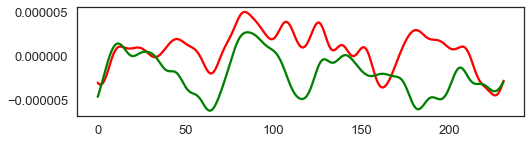

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,2))
plt.plot(cond2_erp[3,:], 'red')
plt.plot(cond1_erp[3,:], 'green')

In [87]:
fig, ax = utils.plot_conditions(pos, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2),
                               ylim=(-6, 6))

AttributeError: 'list' object has no attribute 'get_data'